# Introduction

In [1]:
# importing libraries
import os
import sys

sys.path.append("../")
from utils.predictor import GhanaRainfallPredictor

In [2]:
# 1. Instantiate the class
predictor_class = GhanaRainfallPredictor()

Dataset loaded Successfully
Shape: (10928, 12)

Columns: ['ID', 'user_id', 'confidence', 'predicted_intensity', 'community', 'district', 'prediction_time', 'indicator', 'indicator_description', 'time_observed', 'Target', 'forecast_length']
            ID  user_id  confidence  predicted_intensity community  \
0  ID_KwcTp_12       11         0.3                  0.0    Tumfa    
1  ID_K9vWT_12       17         0.3                  0.0  Kwabeng    
2  ID_AIQg3_12       19         0.3                  0.0  Akropong   
3  ID_px4yf_12       23         0.3                  0.0   Asamama   
4  ID_QYYmK_12       23         0.3                  0.0   Asamama   

     district      prediction_time indicator indicator_description  \
0  atiwa_west  2025-05-30 11:09:33       NaN                   NaN   
1  atiwa_west  2025-05-30 11:09:35       NaN                   NaN   
2  atiwa_west  2025-05-30 11:09:47       NaN                   NaN   
3  atiwa_west  2025-05-30 11:16:33       NaN               

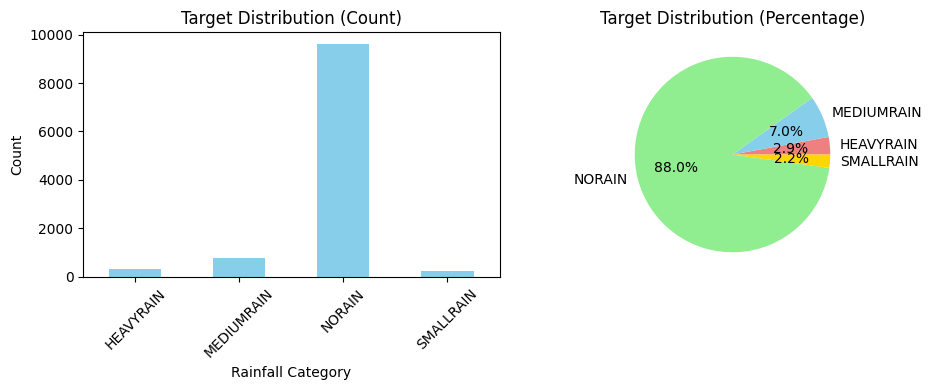


CATEGORICAL COLUMNS ANALYSIS

INDICATOR:
  Unique values: 10
  Non-null values: 503
  Top values:
    clouds: 266 (52.9%)
    sun: 90 (17.9%)
    heat: 53 (10.5%)
    fog: 27 (5.4%)
    wind: 25 (5.0%)
    moon: 19 (3.8%)
    dew: 9 (1.8%)
    star: 8 (1.6%)
    thunder: 4 (0.8%)
    lightning: 2 (0.4%)

COMMUNITY:
  Unique values: 38
  Non-null values: 10,928

DISTRICT:
  Unique values: 3
  Non-null values: 10,928
  Top values:
    atiwa_west: 4,877 (44.6%)
    assin_fosu: 4,815 (44.1%)
    obuasi_east: 1,236 (11.3%)

 FARMER PARTICIPATION ANALYSIS
Total farmers: 43
Average submissions per farmer: 254.1
Most active farmer: 1333 submissions
Farmers with 1 submission: 1
Farmers with 10+ submissions: 38

COMMUNITY COVERAGE
Total communities: 38
Top 5 communities by submissions:
  Akwaduuso: 1,427 (13.1%)
  FOSO ODUMASI : 1,179 (10.8%)
  Asamama: 1,139 (10.4%)
  Assin nyankomasi : 853 (7.8%)
  Akropong : 668 (6.1%)

TEMPORAL PATTERNS
Time range: 2025-05-30 11:09:33 to 2025-07-20 19:23:03

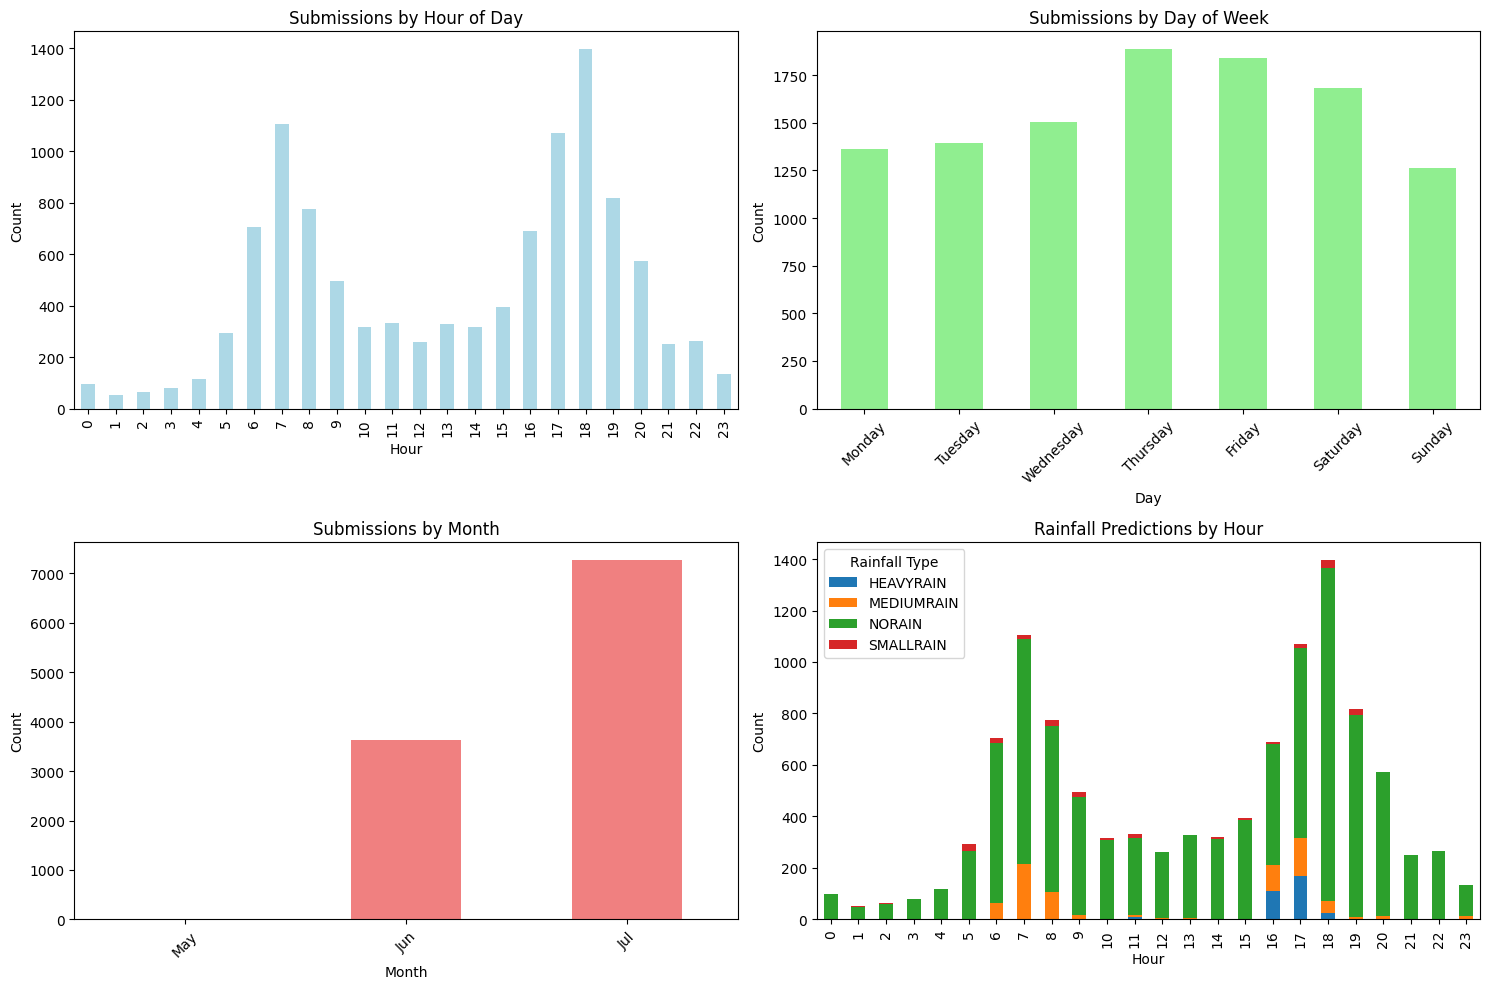


 SAMPLE DATA
First 3 rows:
            ID  user_id  confidence  predicted_intensity community  \
0  ID_KwcTp_12       11         0.3                  0.0    Tumfa    
1  ID_K9vWT_12       17         0.3                  0.0  Kwabeng    
2  ID_AIQg3_12       19         0.3                  0.0  Akropong   

     district      prediction_time indicator indicator_description  \
0  atiwa_west  2025-05-30 11:09:33       NaN                   NaN   
1  atiwa_west  2025-05-30 11:09:35       NaN                   NaN   
2  atiwa_west  2025-05-30 11:09:47       NaN                   NaN   

  time_observed      Target  forecast_length  
0           NaN  MEDIUMRAIN               12  
1           NaN   HEAVYRAIN               12  
2           NaN  MEDIUMRAIN               12  

Data exploration completed!
Summary: 10,928 records from 38 communities


In [3]:
# 2. Loading data and Explore the dataset
df = predictor_class.load_and_explore_dta('../data/train.csv')

In [4]:
# 3. Preprocess the data
processed_df = predictor_class.preprocess_data(df)

=== Preprocess Ghana Rainfall Data ===
Dropping indicator:  95.4% missing values
Dropping indicator_description:  96.8% missing values
Dropping time_observed:  99.3% missing values
After dropping sparse columns:
Categorical features (4): ['community', 'district', 'day_of_week', 'month']
Numerical features   (13): ['farmer_experience_level', 'community_avg_confidence', 'district_avg_confidence', 'predicted_intensity', 'confidence', 'is_weekend', 'is_experienced_farmer', 'forecast_length', 'hour', 'is_morning', 'is_afternoon', 'is_evening', 'is_night']


In [5]:
# Preparing feature and target
X, y = predictor_class.prepare_features_and_target(processed_df, target_column= 'Target')

Using 18 fetures for modeling
Features: ['user_id', 'confidence', 'predicted_intensity', 'community', 'district', 'forecast_length', 'hour', 'day_of_week', 'month', 'is_weekend', 'is_morning', 'is_afternoon', 'is_evening', 'is_night', 'farmer_experience_level', 'is_experienced_farmer', 'community_avg_confidence', 'district_avg_confidence']

Targt classes: ['HEAVYRAIN' 'MEDIUMRAIN' 'NORAIN' 'SMALLRAIN']
Target distribution
HEAVYRAIN: 315 (2.9%)
MEDIUMRAIN: 761 (7.0%)
NORAIN: 9612 (88.0%)
SMALLRAIN: 240 (2.2%)


In [6]:
processed_df.head()

,ID,user_id,confidence,predicted_intensity,community,district,prediction_time,Target,forecast_length,hour,...,month,is_weekend,is_morning,is_afternoon,is_evening,is_night,farmer_experience_level,is_experienced_farmer,community_avg_confidence,district_avg_confidence
0,ID_KwcTp_12,11,0.3,0.0,Tumfa,atiwa_west,2025-05-30 11:09:33,MEDIUMRAIN,12,11,...,5,0,1,0,0,0,55,0,0.563636,0.481259
1,ID_K9vWT_12,17,0.3,0.0,Kwabeng,atiwa_west,2025-05-30 11:09:35,HEAVYRAIN,12,11,...,5,0,1,0,0,0,153,0,0.708637,0.481259
2,ID_AIQg3_12,19,0.3,0.0,Akropong,atiwa_west,2025-05-30 11:09:47,MEDIUMRAIN,12,11,...,5,0,1,0,0,0,100,0,0.582641,0.481259
3,ID_px4yf_12,23,0.3,0.0,Asamama,atiwa_west,2025-05-30 11:16:33,HEAVYRAIN,12,11,...,5,0,1,0,0,0,1130,1,0.303073,0.481259
4,ID_QYYmK_12,23,0.3,0.0,Asamama,atiwa_west,2025-05-30 11:16:55,HEAVYRAIN,12,11,...,5,0,1,0,0,0,1130,1,0.303073,0.481259


In [7]:
# Train Model (without SMOTE)
model, preprocessor = predictor_class.train_model(X, y, use_smote = False)


Model Performance: 
Accuracy: 0.9684

Classification Report: 
              precision    recall  f1-score   support

   HEAVYRAIN       0.65      0.87      0.75        63
  MEDIUMRAIN       0.85      0.91      0.88       152
      NORAIN       0.99      0.98      0.99      1923
   SMALLRAIN       0.95      0.88      0.91        48

    accuracy                           0.97      2186
   macro avg       0.86      0.91      0.88      2186
weighted avg       0.97      0.97      0.97      2186


Cross-validatio  scores: [0.96740995 0.97369926 0.97311213 0.97540046 0.9708238 ]

CV Mean: 0.9721 (+/- 0.0055)



Top 15 Most importance Indigenous Indicators:
                                              feature  importance
0   <bound method ColumnTransformer.get_feature_na...    0.130695
1   <bound method ColumnTransformer.get_feature_na...    0.101619
8   <bound method ColumnTransformer.get_feature_na...    0.101255
23  <bound method ColumnTransformer.get_feature_na...    0.059766
4   <bound method ColumnTransformer.get_feature_na...    0.053092
6   <bound method ColumnTransformer.get_feature_na...    0.042713
10  <bound method ColumnTransformer.get_feature_na...    0.041587
58  <bound method ColumnTransformer.get_feature_na...    0.037203
7   <bound method ColumnTransformer.get_feature_na...    0.031321
52  <bound method ColumnTransformer.get_feature_na...    0.030994
63  <bound method ColumnTransformer.get_feature_na...    0.028852
62  <bound method ColumnTransformer.get_feature_na...    0.028706
2   <bound method ColumnTransformer.get_feature_na...    0.025780
9   <bound method ColumnTrans

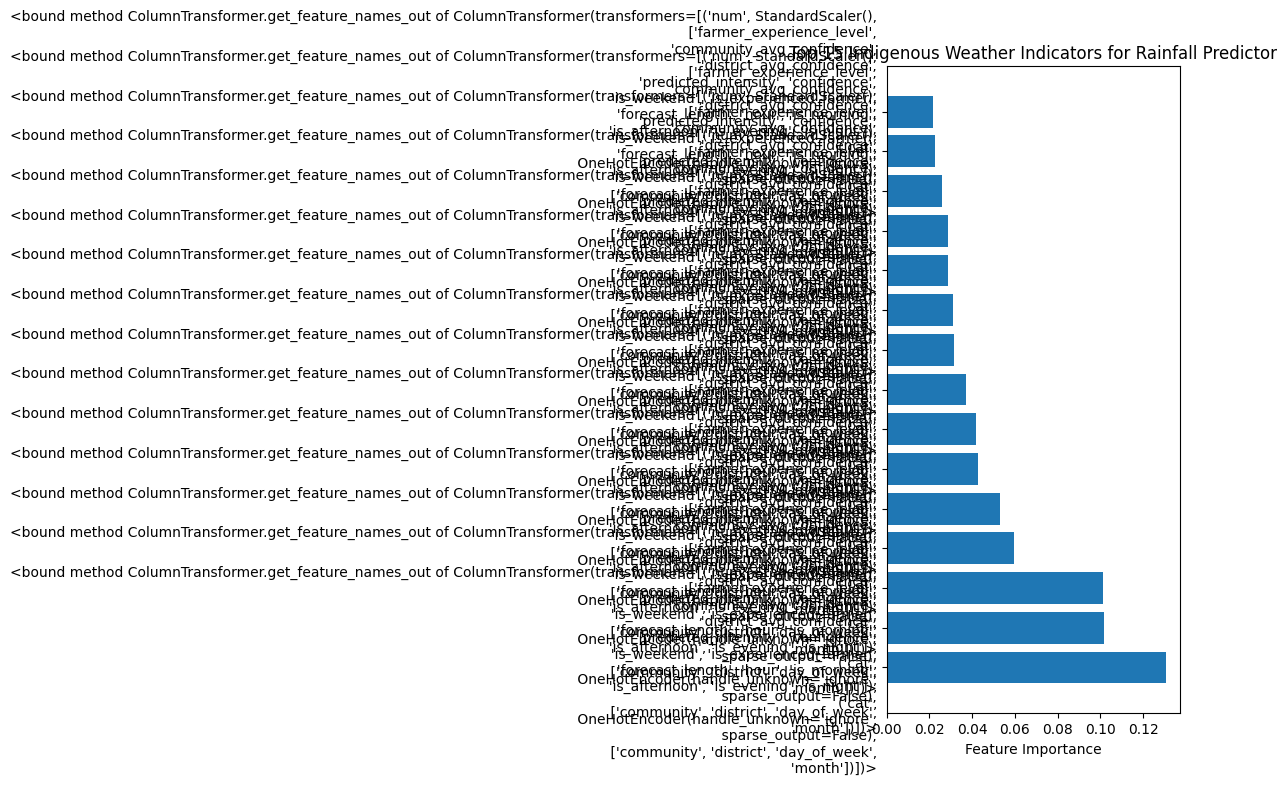

In [9]:
# Analysing feature importance
importance_df = predictor_class.analyze_feature_importance(model)

In [8]:
# Generating insights (without SMOTE)
insights = predictor_class.generate_insights()

=== Indigenous Weather Forecasting Insights ===
Excellent model performance with  96.8% accuracy, suggesting indigenous indicators are highly predictive of rainfall patterns.
Confusion matrix analysis reveals which rainfall categories are most challenging to predict using traditional indicators.


In [10]:
# --- Test model (if labels exist in test.csv) ---
test_results = predictor_class.test_on_file("../data/test.csv")

=== Preprocess Ghana Rainfall Data ===
Dropping indicator:  92.5% missing values
Dropping indicator_description:  92.5% missing values
Dropping time_observed:  92.5% missing values
After dropping sparse columns:
Categorical features (4): ['community', 'district', 'day_of_week', 'month']
Numerical features   (13): ['farmer_experience_level', 'community_avg_confidence', 'district_avg_confidence', 'predicted_intensity', 'confidence', 'is_weekend', 'is_experienced_farmer', 'forecast_length', 'hour', 'is_morning', 'is_afternoon', 'is_evening', 'is_night']


In [13]:
# --- Save submission for competition ---
submission = predictor_class.save_submission(
    test_file="../data/test.csv",
    sample_submission_file="../data/SampleSubmission.csv",
    output_file="MySubmission.csv"
)

=== Preprocess Ghana Rainfall Data ===
Dropping indicator:  92.5% missing values
Dropping indicator_description:  92.5% missing values
Dropping time_observed:  92.5% missing values
After dropping sparse columns:
Categorical features (4): ['community', 'district', 'day_of_week', 'month']
Numerical features   (13): ['farmer_experience_level', 'community_avg_confidence', 'district_avg_confidence', 'predicted_intensity', 'confidence', 'is_weekend', 'is_experienced_farmer', 'forecast_length', 'hour', 'is_morning', 'is_afternoon', 'is_evening', 'is_night']
✅ Submission file saved: MySubmission.csv


In [11]:
# Train Model (with SMOTE)
model, preprocessor = predictor_class.train_model(X, y, use_smote = True)

Applied SMOTE for class balancing

Model Performance: 
Accuracy: 0.9675

Classification Report: 
              precision    recall  f1-score   support

   HEAVYRAIN       0.65      0.87      0.75        63
  MEDIUMRAIN       0.84      0.89      0.87       152
      NORAIN       0.99      0.98      0.99      1923
   SMALLRAIN       0.92      0.94      0.93        48

    accuracy                           0.97      2186
   macro avg       0.85      0.92      0.88      2186
weighted avg       0.97      0.97      0.97      2186


Cross-validatio  scores: [0.97220416 0.97171192 0.96797269 0.96943586 0.97024874]

CV Mean: 0.9703 (+/- 0.0031)


In [12]:
# Generating insights (without SMOTE)
insights = predictor_class.generate_insights()

=== Indigenous Weather Forecasting Insights ===
Excellent model performance with  96.8% accuracy, suggesting indigenous indicators are highly predictive of rainfall patterns.
Confusion matrix analysis reveals which rainfall categories are most challenging to predict using traditional indicators.
